In [2]:
#importing All Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns

In [3]:
#importing DataSet
dataset = pd.read_csv("bank.csv", delimiter =';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
#Checking dataset value is Empty?
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
dataset.duplicated().sum()


0

In [8]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
#find corr between columns
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [10]:
dataset.drop(['marital', 'education','contact','poutcome','day','month'], axis=1,inplace=True)

In [11]:
dataset.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [12]:
dataset.head()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,no,1787,no,no,79,1,-1,0,no
1,33,services,no,4789,yes,yes,220,1,339,4,no
2,35,management,no,1350,yes,no,185,1,330,1,no
3,30,management,no,1476,yes,yes,199,4,-1,0,no
4,59,blue-collar,no,0,yes,no,226,1,-1,0,no


In [13]:
dataset.replace(np.NaN,dataset.mean(),inplace= True)
dataset.head()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,no,1787,no,no,79,1,-1,0,no
1,33,services,no,4789,yes,yes,220,1,339,4,no
2,35,management,no,1350,yes,no,185,1,330,1,no
3,30,management,no,1476,yes,yes,199,4,-1,0,no
4,59,blue-collar,no,0,yes,no,226,1,-1,0,no


In [14]:
dataset.replace(['yes','no'],[1,0],inplace =True)
dataset.head()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,unemployed,0,1787,0,0,79,1,-1,0,0
1,33,services,0,4789,1,1,220,1,339,4,0
2,35,management,0,1350,1,0,185,1,330,1,0
3,30,management,0,1476,1,1,199,4,-1,0,0
4,59,blue-collar,0,0,1,0,226,1,-1,0,0


In [15]:
dataset = pd.get_dummies(dataset)
dataset.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,79,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,220,1,339,4,0,...,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,185,1,330,1,0,...,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,199,4,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,226,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dataset.shape

(4521, 22)

In [17]:
dataset.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown'],
      dtype='object')

In [18]:
#feature scalling
dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())
dataset.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.024826,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.205882,0.0,0.108750,1.0,1.0,0.071500,0.000000,0.389908,0.16,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.059914,0.000000,0.379587,0.04,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.064548,0.061224,0.000000,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.0,0.044469,1.0,0.0,0.073486,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


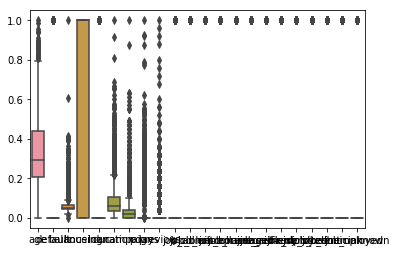

In [19]:
sns.boxplot(data = dataset)

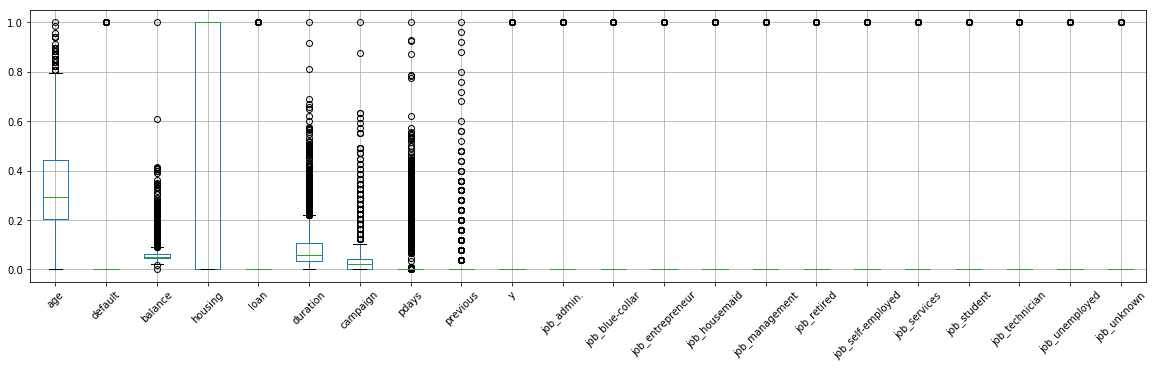

In [20]:
dataset.boxplot(rot=45, figsize=(20,5))

In [21]:
def Split(data):
    train=int(0.70*len(data))
    test=int(0.30*len(data))
    return train,test

train , test = Split(dataset)

In [22]:
print("Train data: ",train)
print("Test data: ",test)

Train data:  3164
Test data:  1356


In [23]:
train_data = dataset.head(train)
test_data = dataset.tail(test)

print("Train_data:")
train_data.head()


Train_data:


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.024826,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.205882,0.0,0.108750,1.0,1.0,0.071500,0.000000,0.389908,0.16,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.059914,0.000000,0.379587,0.04,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.064548,0.061224,0.000000,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.0,0.044469,1.0,0.0,0.073486,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print("test_data:")
test_data.head()

test_data:


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
3165,0.500000,0.0,0.044966,0.0,0.0,0.015558,0.163265,0.000000,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3166,0.338235,0.0,0.059986,1.0,0.0,0.010924,0.000000,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3167,0.455882,0.0,0.055288,1.0,1.0,0.045349,0.142857,0.341743,0.08,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3168,0.588235,0.0,0.076429,0.0,0.0,0.055942,0.020408,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3169,0.279412,0.0,0.040254,1.0,0.0,0.020523,0.020408,0.000000,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
#seprating the output
def separate(dataset):
    output = dataset.y
    dataset = dataset.drop('y', axis=1)
    return dataset, output 


In [26]:
x_train_data, y_train_data = separate(train_data)             

In [27]:
x_test_data , y_test_data = separate(test_data)

In [28]:
print("x_train_data ",x_train_data.shape)
print("y_train_data ",y_train_data.shape)
print("x_test_data ",x_test_data.shape)
print("y_test_data ",y_test_data.shape)

x_train_data  (3164, 21)
y_train_data  (3164,)
x_test_data  (1356, 21)
y_test_data  (1356,)


x_train_data (3164, 22)
x_test_data (1356, 22)
theta_vector (22, 1)


<Figure size 432x288 with 0 Axes>

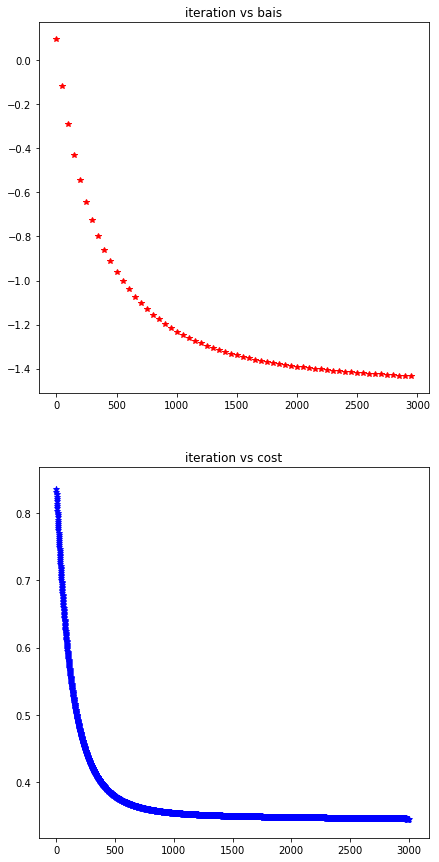

Accuracy 88.5693215339233


In [36]:
class Logistic_Regression:
    
    def __init__(self):
        self.learning_rate = 0.01
        self.epoch = 3000
        
    def Gradient_descent(self, x_train_data,y_train_data,theta_vector):
        fig = plt.figure()
        fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(7, 15))
        theta=theta_vector
        for i in range(0,self.epoch):
            
            hypo = np.dot(theta_vector.T,x_train_data.T)


            sigmoid = np.divide(1,np.add(1,np.exp(-hypo)))

            diff = np.subtract(sigmoid,y_train_data.T)

            
            temp = np.divide(np.dot(diff,x_train_data),x_train_data.shape[0])
#             print("tem", temp.shape)
           
            theta_vector = np.subtract(theta_vector,np.dot(self.learning_rate,temp).T)
           
            if(i%50 == 0):
                ax1.plot(i,theta_vector[0],marker='*',color='r')
                ax1.set_title('iteration vs bais')
            
            
            temp1 = np.multiply(y_train_data.T, np.log(sigmoid))
            temp2 = np.multiply((1 - y_train_data.T), np.log(1-sigmoid))
  
           
            cost = -np.multiply(np.divide(1,len(x_train_data)),np.sum((np.add(temp1,temp2)),axis=1))
            ax2.scatter(i,cost,marker='*',color='b')
            ax2.set_title('iteration vs cost')
        plt.show()

        return theta_vector,cost
       
    def test_function(self,x_test_data,theta_vector):
        
        prediction_y = np.zeros((x_test_data.shape[0], 1), dtype=float)
        #print("---",prediction_y.shape)
        
        hypo = np.dot(theta_vector.T,x_test_data.T)
            
        sigmoid = np.divide(1, 1+np.power(np.e,np.multiply(-1,hypo)))
        
        sigmoid = sigmoid.T
        #print(sigmoid[1:100])
        for i in (range(0, len(sigmoid))):
            
            if sigmoid[i] < 0.5:
                prediction_y[i] = 0
            else:
                prediction_y[i] = 1

        return prediction_y
    

    
    def Accuracy(self,prediction_y,y_test_data):
        count=0
        for i in range(len(y_test_data)):
            if(prediction_y[i] == y_test_data[i]):
                count=count+1
        acc = (count*100)/len(y_test_data)
        #print(prediction_y[1:10],"----",y_test_data[1:10])
        print("Accuracy",acc)
        
            
        
def main(x_train_data,y_train_data,x_test_data,y_test_data):
    obj = Logistic_Regression()
    size =21
    x_train_data = np.array(x_train_data)
    y_train_data = np.array(y_train_data)
    
    x_test_data = np.array(x_test_data)
    y_test_data = np.array(y_test_data)
    
    x_train_data = np.column_stack(( np.ones((x_train_data.shape[0],1)),x_train_data))
    print("x_train_data",x_train_data.shape)
    
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0],1)),x_test_data))
    print("x_test_data", x_test_data.shape)
    
    theta_vector = np.full((size+1,1),0.1)
    print("theta_vector",theta_vector.shape)
    
    # call Gradient_descent()
    theta_vector,cost = obj.Gradient_descent(x_train_data,y_train_data,theta_vector)

    #call y_prediction()
    y_predict_test = obj.test_function(x_test_data,theta_vector)


     # call Accuracy()
    obj.Accuracy(y_predict_test,y_test_data)

    
if __name__ == '__main__':
    main(x_train_data,y_train_data,x_test_data,y_test_data)
    
    